Empty DataFrame
Columns: [Salesman_Name, Month_Year, Total_Sales, Z_score, Outlier]
Index: []


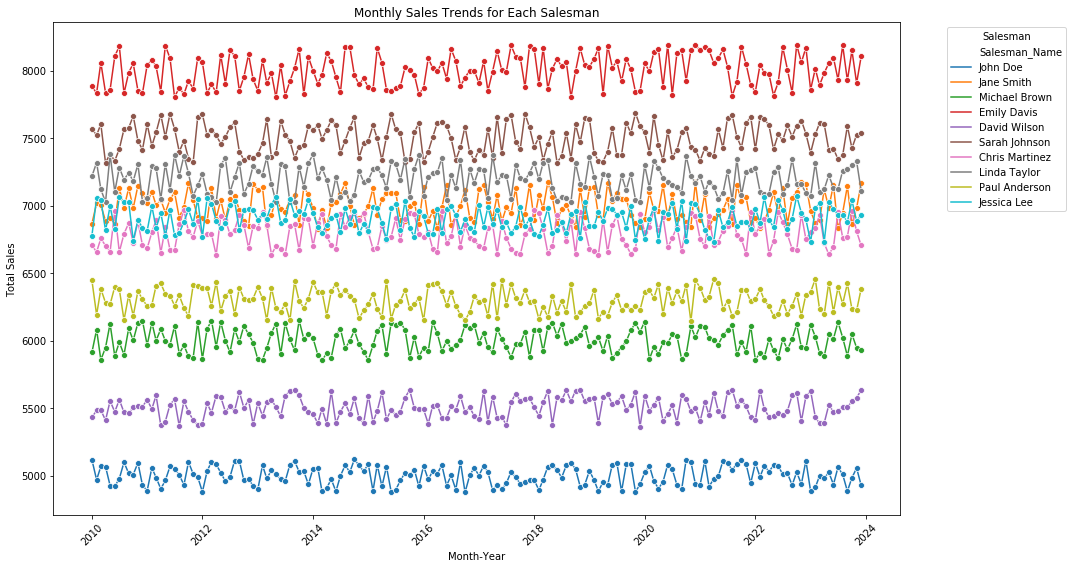

In [14]:
import pandas as pd
import numpy as np
import pyodbc
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

# Define the connection string
conn_str = ("Driver={SQL Server Native Client 11.0};"
            "Server=LAPTOP-SFURJH94\SQLSERVER2019;"
            "Database=PortfolioProject;"
            "Trusted_Connection=yes;")

# Establish connection
cnxn = pyodbc.connect(conn_str)



# SQL query to fetch sales data
query = """
SELECT Salesman_Name, Month_Year, Total_Sales
FROM SalesData
"""

# Fetch the data into a DataFrame
sales_data = pd.read_sql(query, cnxn)

# Close the database connection
cnxn.close()





# Function to calculate Z-scores and identify outliers
def find_outliers(data, threshold=3):
    # Group data by Salesman and calculate Z-scores for each group
    data['Z_score'] = data.groupby('Salesman_Name')['Total_Sales'].transform(lambda x: zscore(x, ddof=0))
    

    
    # Identify outliers (absolute Z-score greater than threshold)
    data['Outlier'] = data['Z_score'].abs() > threshold
    
    return data

# Find outliers in the sales data
outliers_data = find_outliers(sales_data)

# Print outliers
print(outliers_data[outliers_data['Outlier']])



# Convert Month_Year to datetime
sales_data['Month_Year'] = pd.to_datetime(sales_data['Month_Year'])

# Sort data by Month_Year
sales_data = sales_data.sort_values(by='Month_Year')

# Plotting the monthly sales for each employee
plt.figure(figsize=(15, 8))

# Create a line plot for each salesman
sns.lineplot(x='Month_Year', y='Total_Sales', hue='Salesman_Name', data=sales_data, marker='o')

# Set plot title and labels
plt.title('Monthly Sales Trends for Each Salesman')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Display the legend outside the plot
plt.legend(title='Salesman', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

In [36]:
# now lets update the sales amount for 2 of them by updating the database table and lets see if our script can catch the outliers.
# Run the below query in SQL server to change the sales amount.

'''
UPDATE salesdata
SET total_sales=80000
WHERE Salesman_Name='Emily Davis'
AND Month_Year='2014-01-01'

UPDATE salesdata
SET total_sales=80000
WHERE Salesman_Name='John Doe'
AND Month_Year='2017-01-01'
'''


"\nUPDATE salesdata\nSET total_sales=80000\nWHERE Salesman_Name='Emily Davis'\nAND Month_Year='2014-01-01'\n\nUPDATE salesdata\nSET total_sales=80000\nWHERE Salesman_Name='John Doe'\nAND Month_Year='2017-01-01'\n"

    Salesman_Name  Month_Year  Total_Sales    Z_score  Outlier
483   Emily Davis  2014-01-01      80000.0  12.919837     True
840      John Doe  2017-01-01      80000.0  12.921857     True


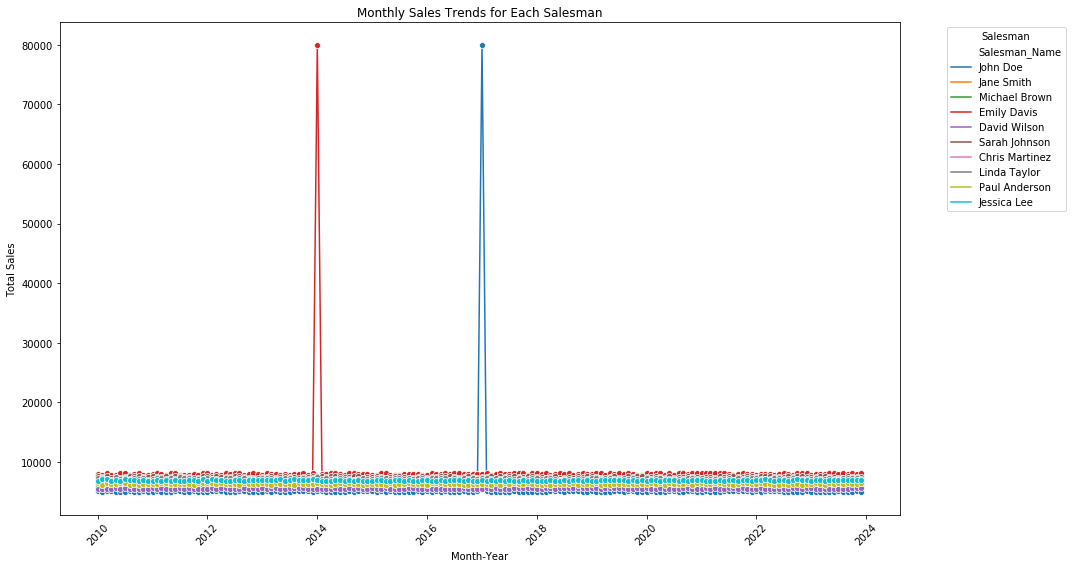

In [15]:
# Define the connection string
conn_str = ("Driver={SQL Server Native Client 11.0};"
            "Server=LAPTOP-SFURJH94\SQLSERVER2019;"
            "Database=PortfolioProject;"
            "Trusted_Connection=yes;")

# Establish connection
cnxn = pyodbc.connect(conn_str)



# SQL query to fetch sales data
query = """
SELECT Salesman_Name, Month_Year, Total_Sales
FROM SalesData
"""

# Fetch the data into a DataFrame
sales_data = pd.read_sql(query, cnxn)

# Close the database connection
cnxn.close()





# Function to calculate Z-scores and identify outliers
def find_outliers(data, threshold=3):
    # Group data by Salesman and calculate Z-scores for each group
    data['Z_score'] = data.groupby('Salesman_Name')['Total_Sales'].transform(lambda x: zscore(x, ddof=0))
    

    
    # Identify outliers (absolute Z-score greater than threshold)
    data['Outlier'] = data['Z_score'].abs() > threshold
    
    return data

# Find outliers in the sales data
outliers_data = find_outliers(sales_data)

# Print outliers
print(outliers_data[outliers_data['Outlier']])



# Convert Month_Year to datetime
sales_data['Month_Year'] = pd.to_datetime(sales_data['Month_Year'])

# Sort data by Month_Year
sales_data = sales_data.sort_values(by='Month_Year')

# Plotting the monthly sales for each employee
plt.figure(figsize=(15, 8))

# Create a line plot for each salesman
sns.lineplot(x='Month_Year', y='Total_Sales', hue='Salesman_Name', data=sales_data, marker='o')

# Set plot title and labels
plt.title('Monthly Sales Trends for Each Salesman')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Display the legend outside the plot
plt.legend(title='Salesman', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()